#### BIKE SHARING DATASET _LINEAR REGRESSION 

by __ S.Anil

# 1. READING THE DATASET AND UNDERSTANDING THE DATA

In [1]:
#Import all required pacakges and Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [2]:
#Importing Dataset 
bikes = pd.read_csv("D:\\UPGRAD\Machine Learning- I\\Module - II Assignment _ Linear Regression\\Bike Sharing Dataset.csv")
bikes.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
# Converting date to Pandas datetime format
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

In [7]:
bikes['dteday'] = bikes['dteday'].dt.strftime('%Y/%d/%m')

In [8]:
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2018/01/01       1   0     1        0        1           1   
1        2  2018/01/02       1   0     1        0        2           1   
2        3  2018/01/03       1   0     1        0        3           1   
3        4  2018/01/04       1   0     1        0        4           1   
4        5  2018/01/05       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [9]:
bikes[['dteday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dteday  730 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [10]:
bikes[["dteday"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dteday  730 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [11]:
bikes["dteday"] = pd.to_datetime(bikes["dteday"],dayfirst=True)
bikes.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        1           1   
1        2 2018-01-02       1   0     1        0        2           1   
2        3 2018-01-03       1   0     1        0        3           1   
3        4 2018-01-04       1   0     1        0        4           1   
4        5 2018-01-05       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [12]:
# Deriving "days since the given data started"
from datetime import datetime

d0 = datetime(year = 2018, month= 1, day = 1)
#d1 = bikes.dteday
#delta = d1 - d0
bikes['day']= bikes["dteday"]- d0

In [13]:
bikes.head(5)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        1           1   
1        2 2018-01-02       1   0     1        0        2           1   
2        3 2018-01-03       1   0     1        0        3           1   
3        4 2018-01-04       1   0     1        0        4           1   
4        5 2018-01-05       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt    day  
0   985 0 days  
1   801 1 days  
2  1349 2 days  
3  1562 3 days  
4  1600 4 days

In [14]:
# Cleaning days
bikes['day'] = bikes['day'].astype(str)
bikes['day'] = bikes['day'].apply(lambda x:x.replace(" days",""))
bikes['day'] = bikes['day'].apply(lambda x:x.replace(" 00:00:00.000000000",""))
bikes['day'] = bikes['day'].astype(str).astype(int)

In [15]:
bikes.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        1           1   
1        2 2018-01-02       1   0     1        0        2           1   
2        3 2018-01-03       1   0     1        0        3           1   
3        4 2018-01-04       1   0     1        0        4           1   
4        5 2018-01-05       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  day  
0   985    0  
1   801    1  
2  1349    2  
3  1562    3  
4  1600    4

In [16]:
bikes.tail()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726 2019-12-27       1   1    12        0        5           1   
726      727 2019-12-28       1   1    12        0        6           0   
727      728 2019-12-29       1   1    12        0        0           0   
728      729 2019-12-30       1   1    12        0        1           1   
729      730 2019-12-31       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  day  
725  2114  725  
726  3095  726  
727  1341  727  
728  1796  728  
729  2729  729

## 2. Visualization of Data: Exploratory Data Analysis 

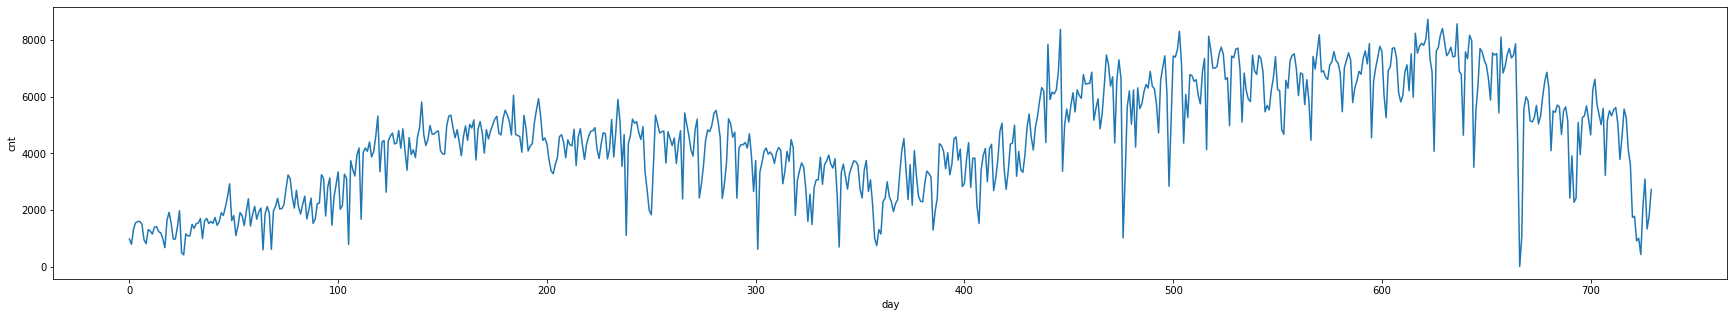

In [17]:
# days vs cnt
#bikes.plot.scatter(x='day', y='cnt')
plt.figure(figsize = (30,5))  
sns.lineplot(x = "day", y = 'cnt', data = bikes)
plt.show()

Inference : There is signifcant changes with respect to days during changes in - months, year and season

In [18]:
from statistics import *

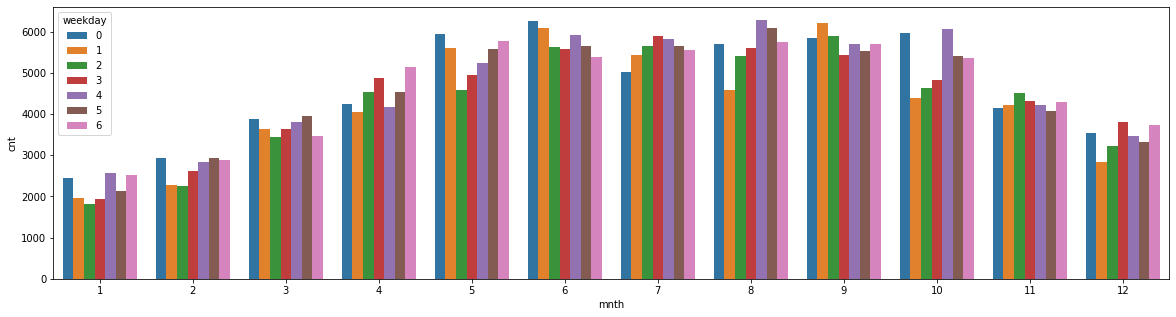

In [19]:
# weekday vs cnt
#bikes.plot.scatter(x='day', y='cnt')
plt.figure(figsize = (20,5))  
sns.barplot(x = "mnth", y = "cnt", data = bikes,hue = "weekday", estimator=mean, ci = 0)
plt.show()

Inference - Generally, bikes are being used on 0th day of the week and overall high in June , July, August and September

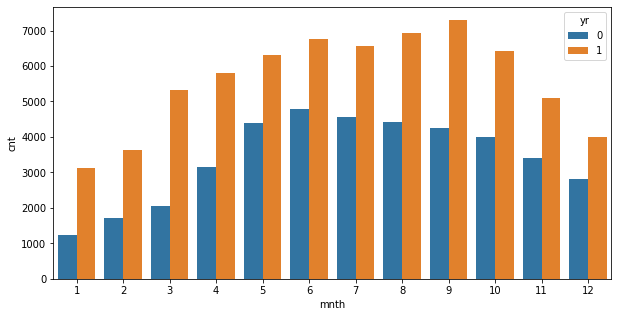

In [20]:
# Month vs cnt
plt.figure(figsize = (10,5))  
sns.barplot(x = "mnth", y = "cnt", data = bikes, hue = "yr", ci=0,)
plt.show()

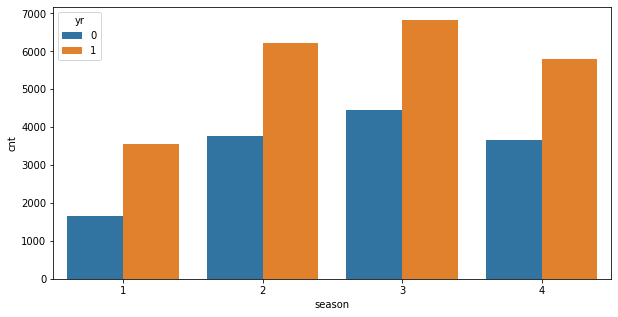

In [21]:
# Season vs cnt
plt.figure(figsize = (10,5))  
sns.barplot(x = "season", y = "cnt", data = bikes, hue = "yr",ci=0)
plt.show()

Inference - (from above two plots )
1. Increase in 2nd Year
2. Highest in Season 3 i.e. fall
3. Increase in the month of June, July , August and September 

<Figure size 1440x1440 with 0 Axes>

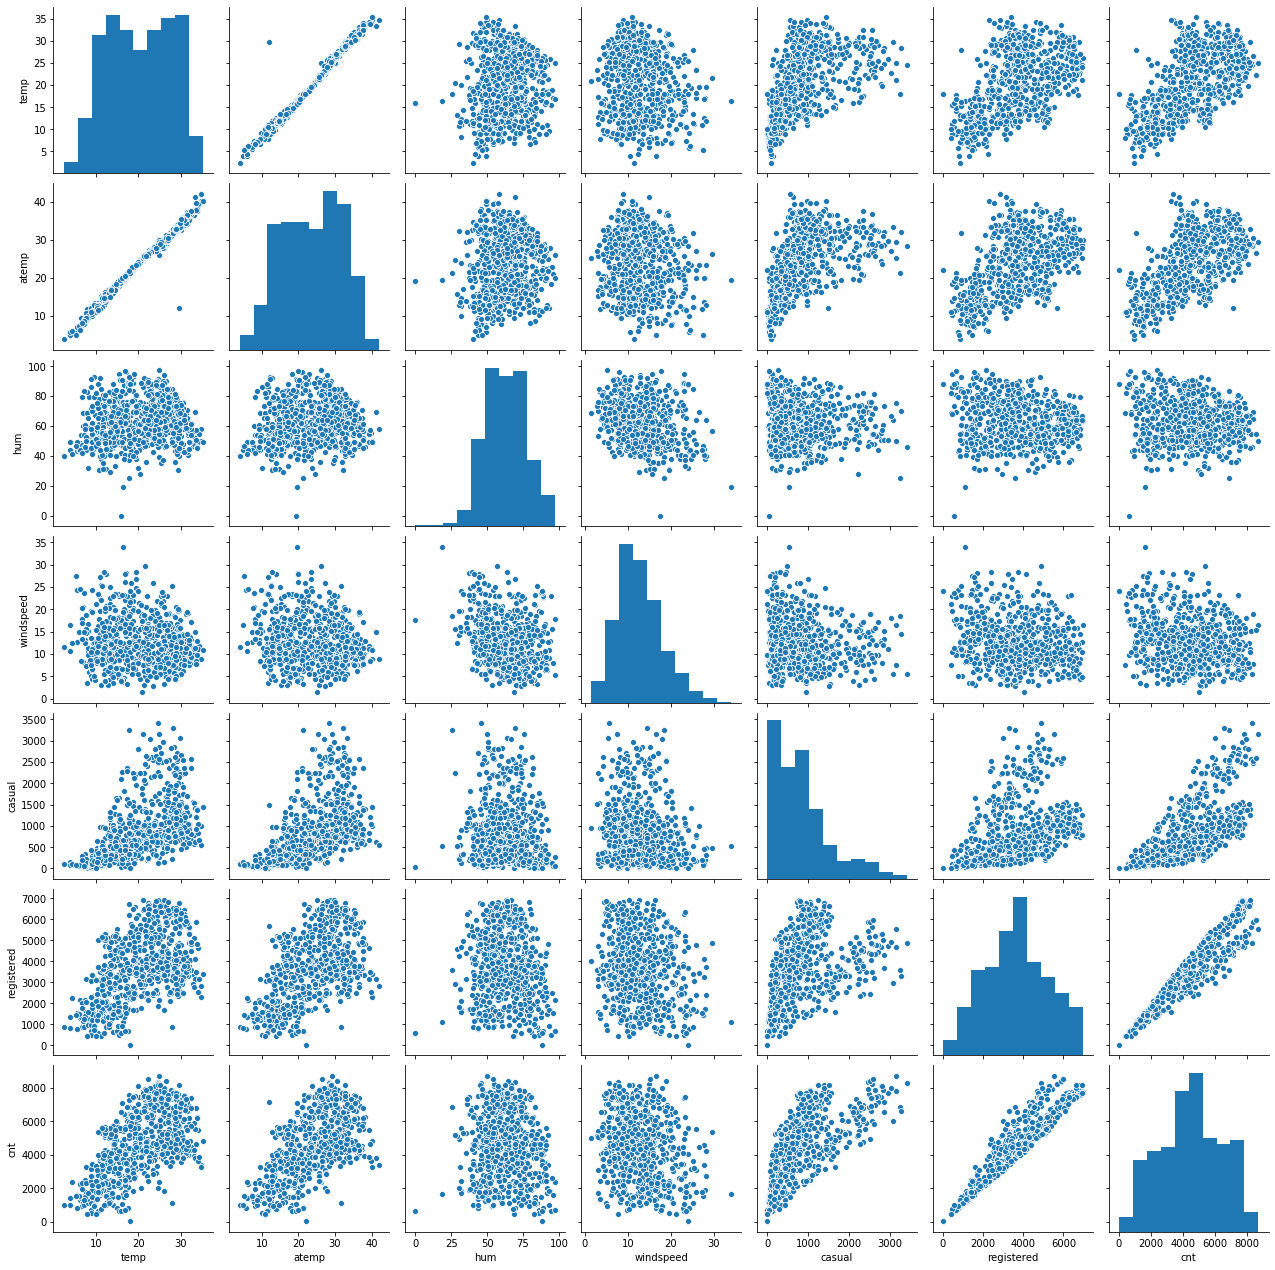

In [22]:
plt.figure(figsize = (20,20))
sns.pairplot(bikes[['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']])
plt.show()

Inference -
1. Major relation between cnt with casual , registered columns ( since the summation of casual and registered equates to cnt) 
2. a significant relation between temp and atemp with cnt.

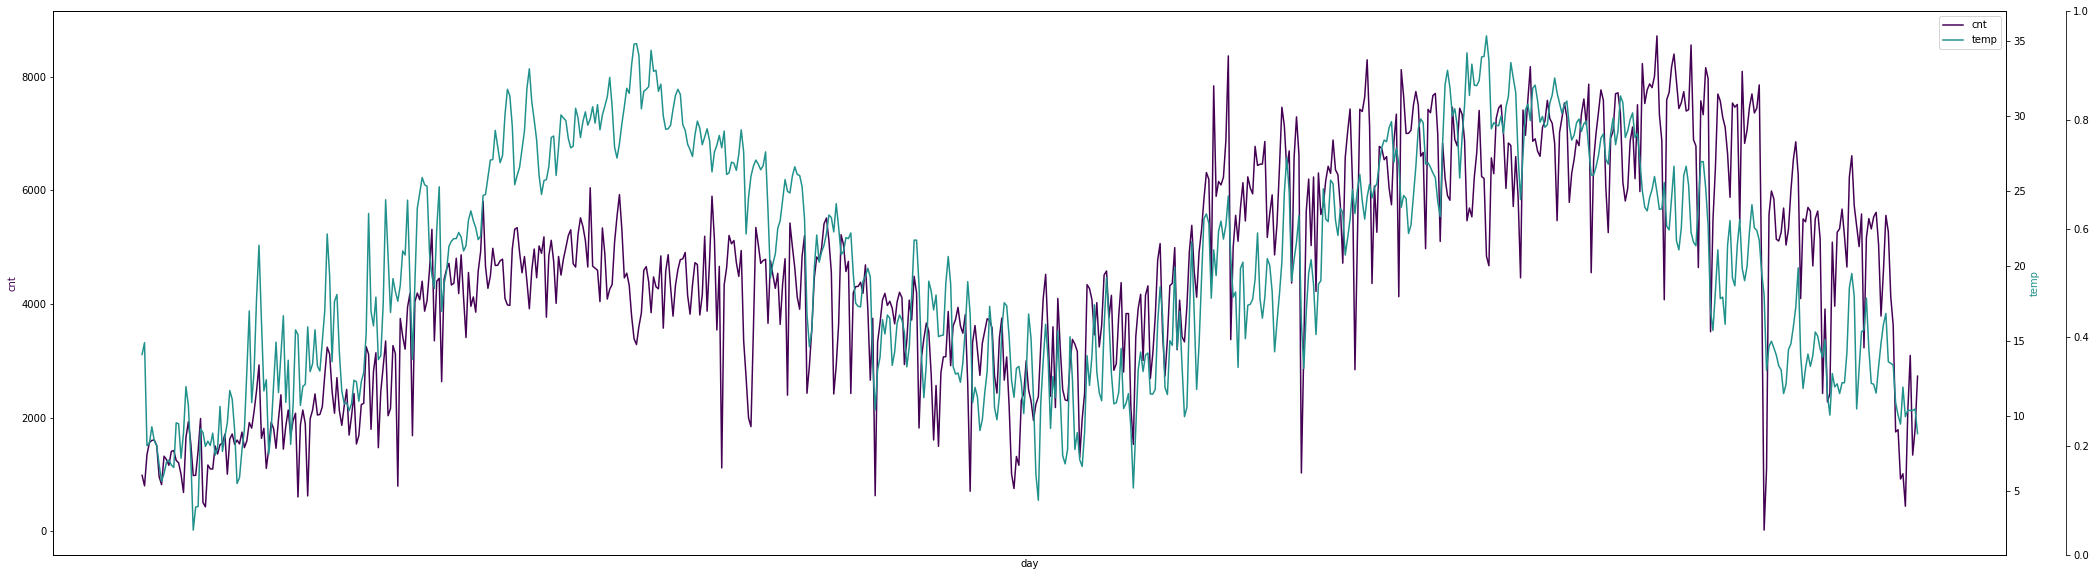

In [23]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure(figsize=(35,10))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("day")
host.set_ylabel("cnt")
par1.set_ylabel("temp")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(bikes.day,bikes.cnt, color=color1,label="cnt")
p2, = par1.plot(bikes.day,bikes.temp,color=color2, label="temp")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

Inference -- 
1. there is increase and decrease in temperature in the start from the year and then it gradually decreases as well, 
however there is some relation with increase and decrease alongwith temperature but not entirely.
2. Temparature is changed seasonally

In [24]:
year_bikes=bikes.groupby(['yr'])['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt'].median()
year_bikes

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


temp     atemp     hum  windspeed  casual  registered   cnt
yr                                                                  
0   19.645847  23.64230  64.750  12.522300     614        2915  3740
1   21.080847  25.12565  61.125  11.707982     905        4790  5936

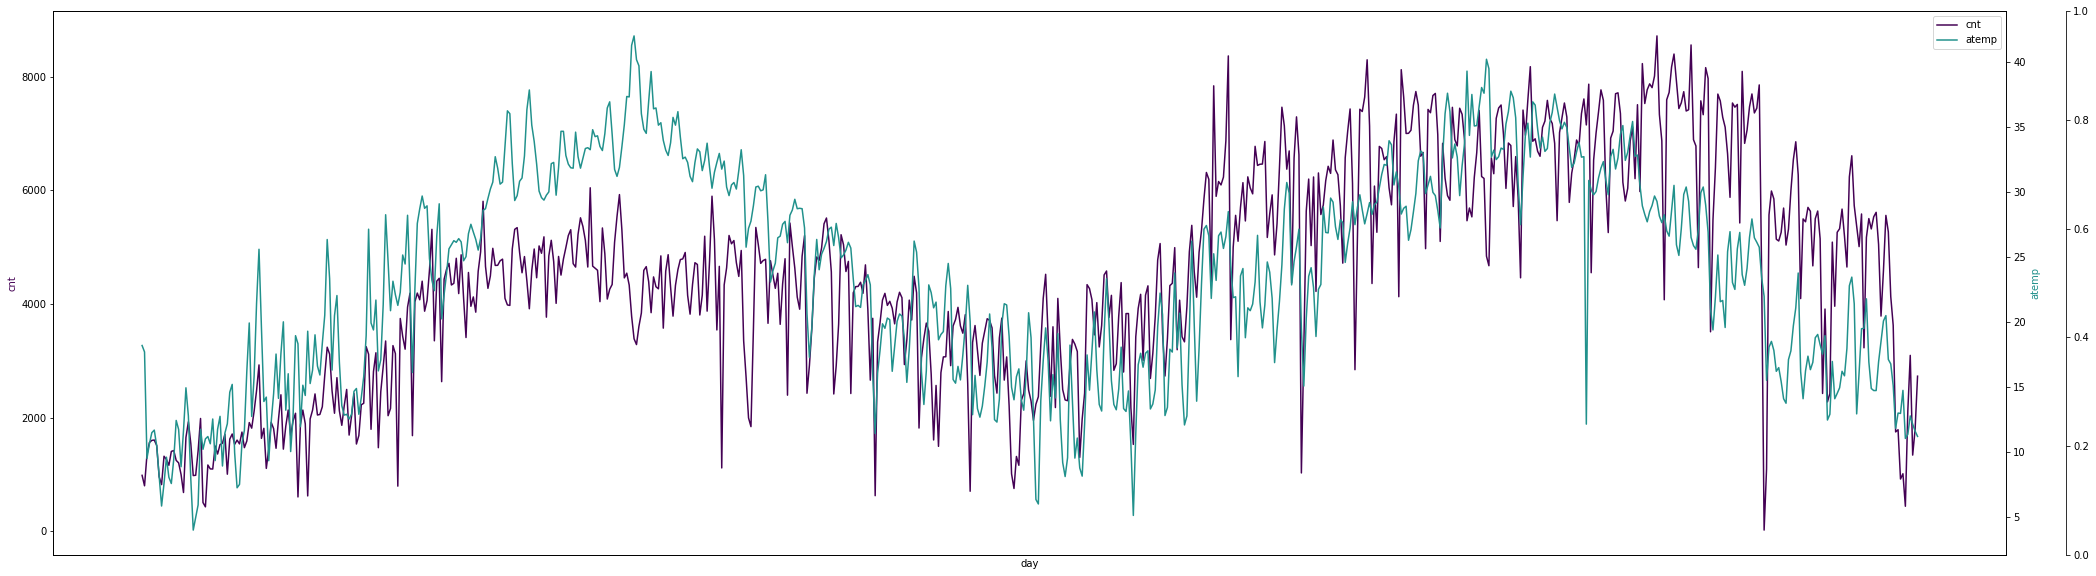

In [25]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure(figsize=(35,10))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("day")
host.set_ylabel("cnt")
par1.set_ylabel("atemp")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(bikes.day,bikes.cnt, color=color1,label="cnt")
p2, = par1.plot(bikes.day,bikes.atemp,color=color2, label="atemp")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

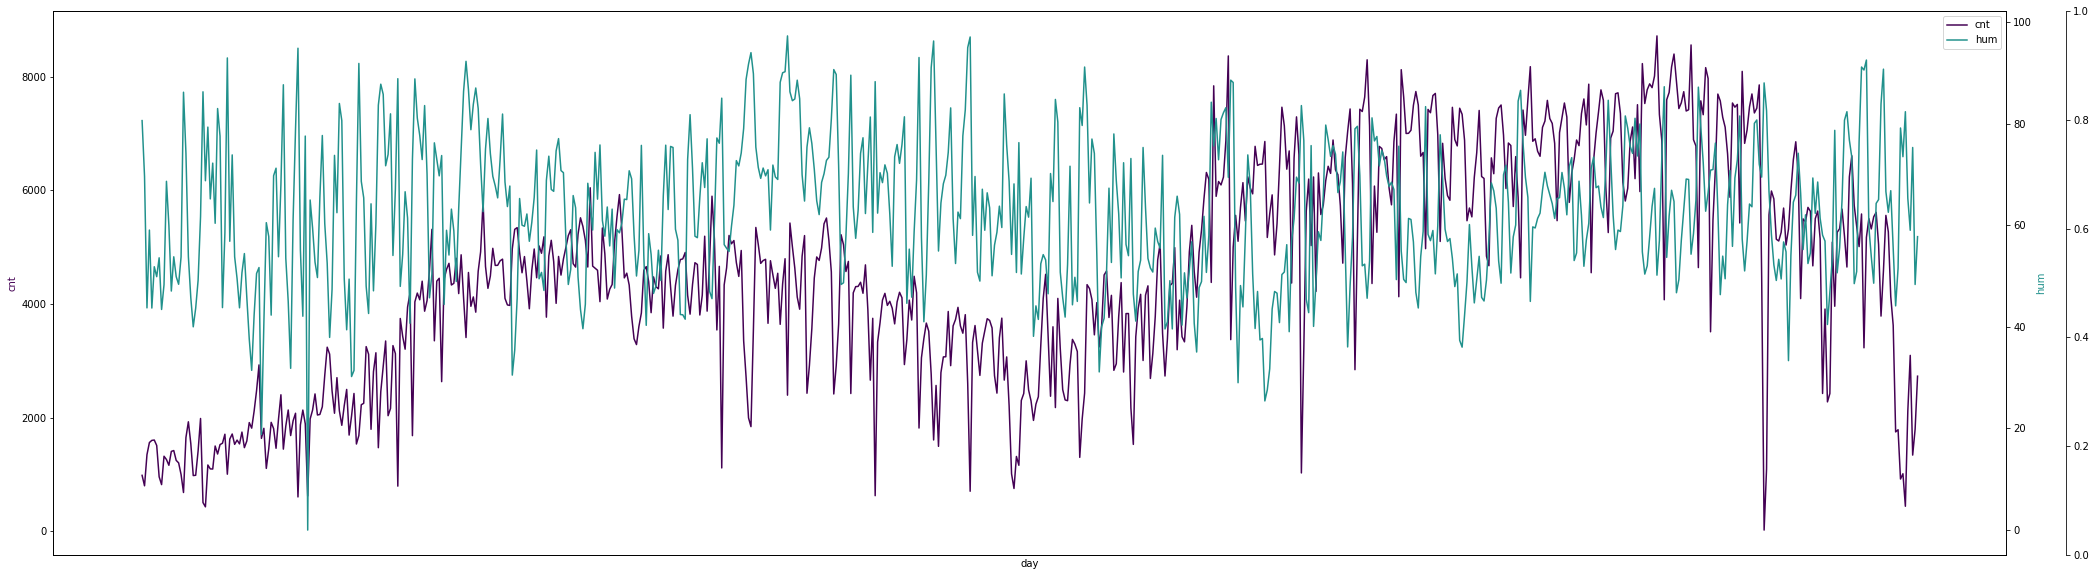

In [26]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure(figsize=(35,10))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("day")
host.set_ylabel("cnt")
par1.set_ylabel("hum")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(bikes.day,bikes.cnt, color=color1,label="cnt")
p2, = par1.plot(bikes.day,bikes.hum,color=color2, label="hum")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

Inference - 
Not much of a change in cnt due to humidity 


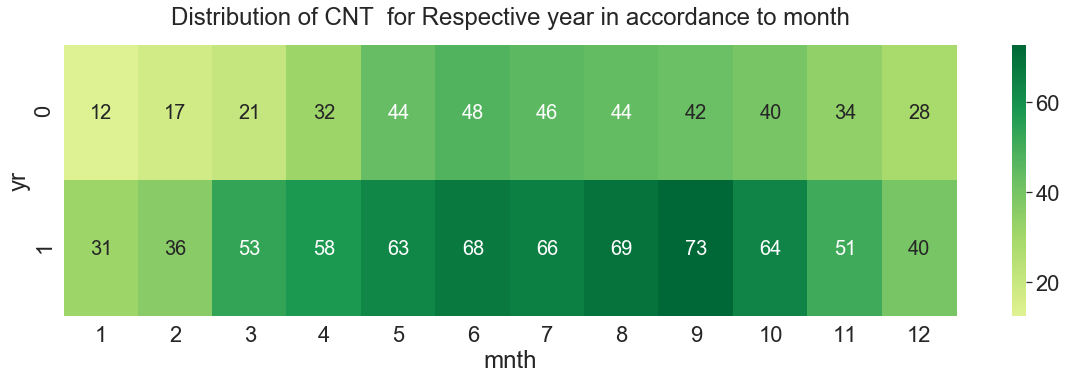

In [27]:
plt.figure(figsize = (20,5))
year_month = pd.pivot_table(data=bikes, index="yr", columns="mnth", values="cnt")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 20
sns.set(font_scale = 2)
plt.title("Distribution of CNT  for Respective year in accordance to month")
sns.heatmap(year_month.round(3)/100, cmap="RdYlGn", annot=True, center=0.427,annot_kws={"size":20})

plt.show()

Inference - 
1. Increase in respective months in cnt in second year dense in the month of June to September 

Inference - 
1. Increase in second year 
2. Increase when holiday - 0 i.e. yes holiday 


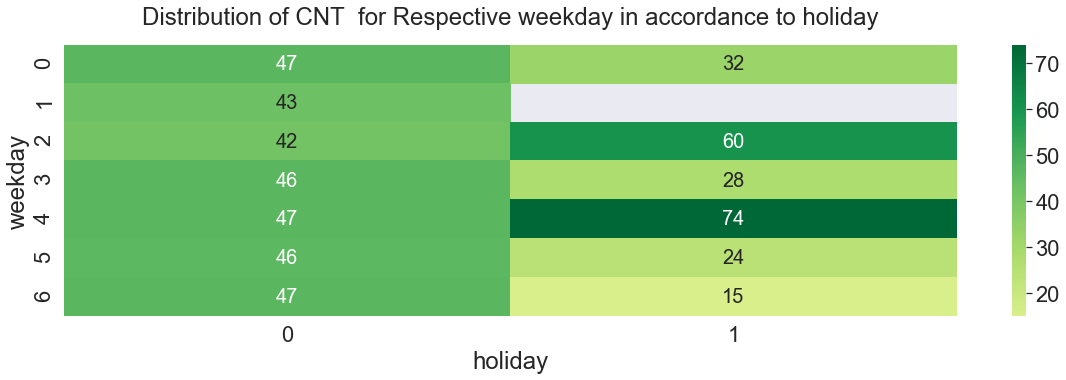

In [28]:
plt.figure(figsize = (20,5))
weekday_holiday = pd.pivot_table(data=bikes, index="weekday", columns="holiday", values="cnt")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 20
sns.set(font_scale = 2)
plt.title("Distribution of CNT  for Respective weekday in accordance to holiday")
sns.heatmap(weekday_holiday.round(3)/100, cmap="RdYlGn", annot=True, center=0.427,annot_kws={"size":20})

plt.show()

Inference -

1. Consistent when holiday - 0 i.e. yes holiday
2. A good number of cnt on Sunday (i.e. 0 ) and when not a holday a adrop in Monday

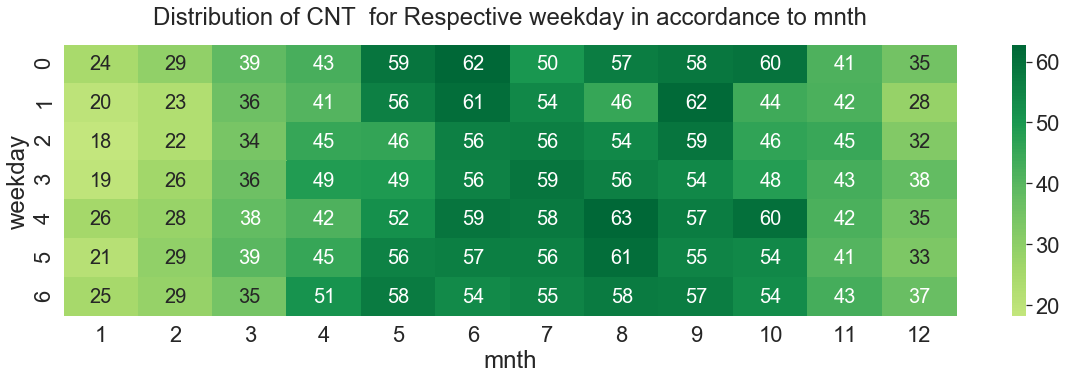

In [29]:
plt.figure(figsize = (20,5))
weekday_mnth = pd.pivot_table(data=bikes, index="weekday", columns="mnth", values="cnt")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 20
sns.set(font_scale = 2)
plt.title("Distribution of CNT  for Respective weekday in accordance to mnth")
sns.heatmap(weekday_mnth.round(3)/100, cmap="RdYlGn", annot=True, center=0.427,annot_kws={"size":20})

plt.show()

Inference - 
1. A trend can be seen as mentioned before in months (i.e. increase - May to October)
2. However is comparision to weekdays - its more or less increases in 4 (Thursday ) and reduces in 0 (Sunday)

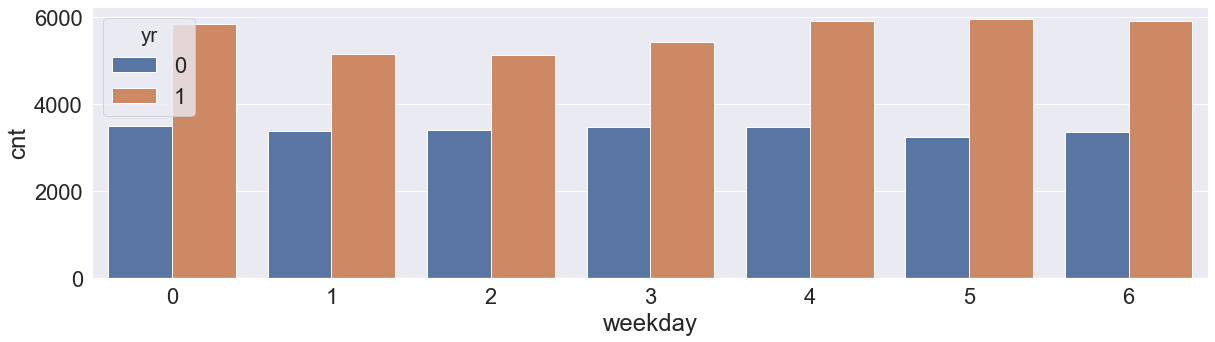

In [30]:
# weekday vs cnt
#bikes.plot.scatter(x='day', y='cnt')
plt.figure(figsize = (20,5))  
sns.barplot(x = "weekday", y = "cnt", data = bikes,hue = "yr", estimator=mean,ci = 0)
plt.show()

Inference - 
People have duly been scheduling quite uniformly on saturday, Sunday, thursdays and Fridays 
In Year 0 there is not much change in mean cnt on each weekday

In [31]:
year_month.round(2)

mnth       1        2        3        4        5        6        7        8   \
yr                                                                             
0     1231.90  1721.96  2065.97  3162.33  4381.32  4783.73  4559.39  4409.39   
1     3120.77  3617.96  5318.55  5807.47  6318.23  6761.00  6567.97  6919.45   

mnth       9        10       11       12  
yr                                        
0     4247.27  3984.23  3405.57  2816.87  
1     7285.77  6414.23  5088.80  3990.74

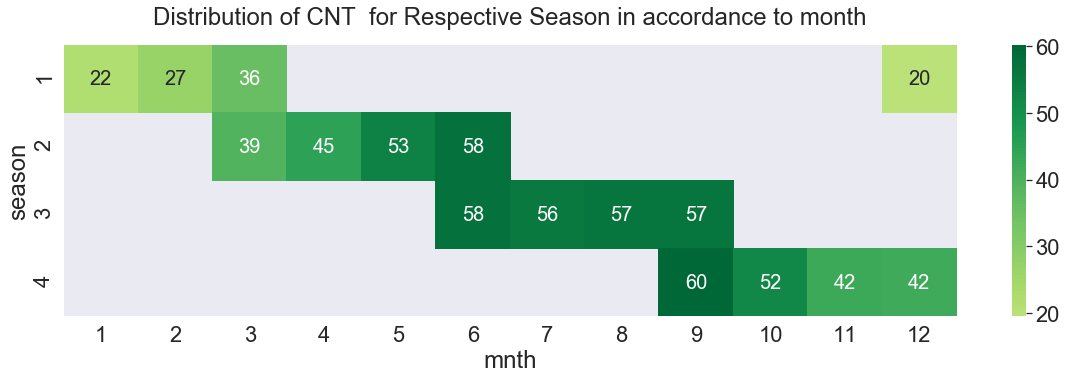

In [32]:
plt.figure(figsize = (20,5))
year_month = pd.pivot_table(data=bikes, index="season", columns="mnth", values="cnt")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 20
sns.set(font_scale = 2)
plt.title("Distribution of CNT  for Respective Season in accordance to month")
sns.heatmap(year_month.round(3)/100, cmap="RdYlGn", annot=True, center=0.427,annot_kws={"size":20})

plt.show()

THe changes can be seen - 
- In Low in season 1 , ( Month Jan to March )
- Overlapping show the similar seasons in the same month
- In Season 2 slight increase ( March to June )
- In Seaseon 3  consistent  ( June to September)
- In Season 4 Decrease in cnt ( Sept to December)

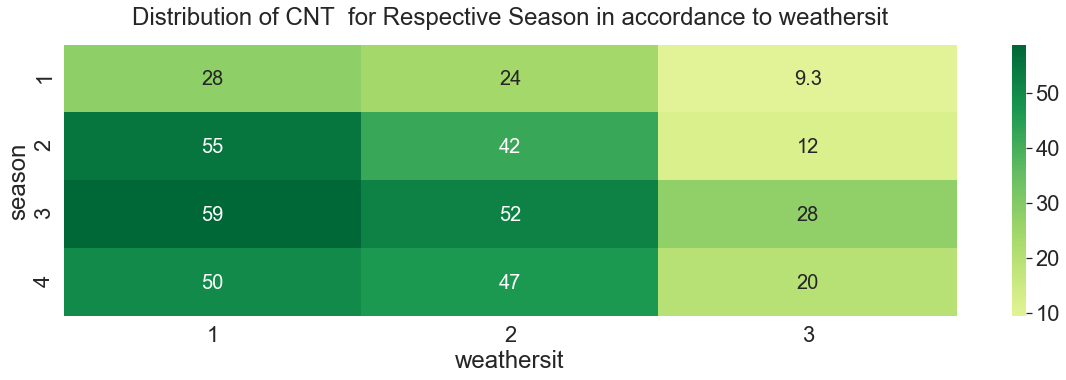

In [33]:
plt.figure(figsize = (20,5))
year_month = pd.pivot_table(data=bikes, index="season", columns="weathersit", values="cnt")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 20
sns.set(font_scale = 2)
plt.title("Distribution of CNT  for Respective Season in accordance to weathersit")
sns.heatmap(year_month.round(3)/100, cmap="RdYlGn", annot=True, center=0.427,annot_kws={"size":20})

plt.show()

Inference - 
1. Clear preference of Season 3 amongst all other seasons 
2. Huge drop in WEather sit 3 i.e. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [34]:
bikes.drop(["instant"],axis=1,inplace =True)

#### As per the Problem Statement _ CNT will be the Target Variable
(Since Casual and Registered Variables sum to provide "CNT", thus dropping Registered and Casual Columns) 

In [35]:
#bikes.drop(["casual","registered"],axis=1,inplace =True)

In [36]:
bikes.drop(["dteday"],axis=1,inplace =True)

In [37]:
bikes

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        1           1           2  14.110847   
1         1   0     1        0        2           1           2  14.902598   
2         1   0     1        0        3           1           1   8.050924   
3         1   0     1        0        4           1           1   8.200000   
4         1   0     1        0        5           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        5           1           2  10.420847   
726       1   1    12        0        6           0           2  10.386653   
727       1   1    12        0        0           0           2  10.386653   
728       1   1    12        0        1           1           1  10.489153   
729       1   1    12        0        2           1           2   8.849153   

        atemp      hum  windspeed  casual  registered   cnt  day  
0    18.18125  80.5833  10.749882     331         654   985    0  
1    17.68695  69.6087  16.652113     131         670   801    1  
2     9.47025  43.7273  16.636703     120        1229  1349    2  
3    10.60610  59.0435  10.739832     108        1454  1562    3  
4    11.46350  43.6957  12.522300      82        1518  1600    4  
..        ...      ...        ...     ...         ...   ...  ...  
725  11.33210  65.2917  23.458911     247        1867  2114  725  
726  12.75230  59.0000  10.416557     644        2451  3095  726  
727  12.12000  75.2917   8.333661     159        1182  1341  727  
728  11.58500  48.3333  23.500518     364        1432  1796  728  
729  11.17435  57.7500  10.374682     439        2290  2729  729  

[730 rows x 15 columns]

In [38]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

In [39]:
# Putting feature variable to X
X = bikes[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed','day']]

# Putting response variable to y
y = bikes['cnt']

In [40]:
bikes.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

## The List of Categorical Variables: 
1. Season
2. Year
3. Mnth
4. Holiday 
5. Weekday
6. workingday 
7. weathersit

In [41]:
bikes['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [42]:
def ass_season(x):
    if x == 1:
        return "spring"
    elif x ==2 :
        return "summer"
    elif x == 3 :
        return "fall"
    else: 
        return "winter"
bikes["season"] = bikes["season"].apply(ass_season)

In [43]:
bikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        1           1           2  14.110847   
1  spring   0     1        0        2           1           2  14.902598   
2  spring   0     1        0        3           1           1   8.050924   
3  spring   0     1        0        4           1           1   8.200000   
4  spring   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  day  
0  18.18125  80.5833  10.749882     331         654   985    0  
1  17.68695  69.6087  16.652113     131         670   801    1  
2   9.47025  43.7273  16.636703     120        1229  1349    2  
3  10.60610  59.0435  10.739832     108        1454  1562    3  
4  11.46350  43.6957  12.522300      82        1518  1600    4

In [44]:
bikes["mnth"].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [45]:
def obj_map(x):
    return x.map({1:'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun', 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [46]:
bikes[["mnth"]] = bikes[["mnth"]].apply(obj_map)
bikes.head()

season  yr mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0        1           1           2  14.110847   
1  spring   0  Jan        0        2           1           2  14.902598   
2  spring   0  Jan        0        3           1           1   8.050924   
3  spring   0  Jan        0        4           1           1   8.200000   
4  spring   0  Jan        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  day  
0  18.18125  80.5833  10.749882     331         654   985    0  
1  17.68695  69.6087  16.652113     131         670   801    1  
2   9.47025  43.7273  16.636703     120        1229  1349    2  
3  10.60610  59.0435  10.739832     108        1454  1562    3  
4  11.46350  43.6957  12.522300      82        1518  1600    4

In [47]:
bikes["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [48]:
bikes["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [49]:
bikes["yr"].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [50]:
bikes["workingday"].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [51]:
bikes["weekday"].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [52]:
def week_day_map(x):
    return x.map({1:'Mon', 2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat', 0:'Sun'})
bikes[["weekday"]]=bikes[["weekday"]].apply(week_day_map)
bikes.head()

season  yr mnth  holiday weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0     Mon           1           2  14.110847   
1  spring   0  Jan        0     Tue           1           2  14.902598   
2  spring   0  Jan        0     Wed           1           1   8.050924   
3  spring   0  Jan        0     Thu           1           1   8.200000   
4  spring   0  Jan        0     Fri           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  day  
0  18.18125  80.5833  10.749882     331         654   985    0  
1  17.68695  69.6087  16.652113     131         670   801    1  
2   9.47025  43.7273  16.636703     120        1229  1349    2  
3  10.60610  59.0435  10.739832     108        1454  1562    3  
4  11.46350  43.6957  12.522300      82        1518  1600    4

In [53]:

"""
weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

"""
def weather_sit_map(x):
    return x.map({1:'clear', 2:'Mist_cloudy',3:'Light_snow',4:'Heavy_rain'})
bikes[["weathersit"]]=bikes[["weathersit"]].apply(weather_sit_map)
bikes.head()

season  yr mnth  holiday weekday  workingday   weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist_cloudy  14.110847   
1  spring   0  Jan        0     Tue           1  Mist_cloudy  14.902598   
2  spring   0  Jan        0     Wed           1        clear   8.050924   
3  spring   0  Jan        0     Thu           1        clear   8.200000   
4  spring   0  Jan        0     Fri           1        clear   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  day  
0  18.18125  80.5833  10.749882     331         654   985    0  
1  17.68695  69.6087  16.652113     131         670   801    1  
2   9.47025  43.7273  16.636703     120        1229  1349    2  
3  10.60610  59.0435  10.739832     108        1454  1562    3  
4  11.46350  43.6957  12.522300      82        1518  1600    4

In [54]:
bikes.columns    

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

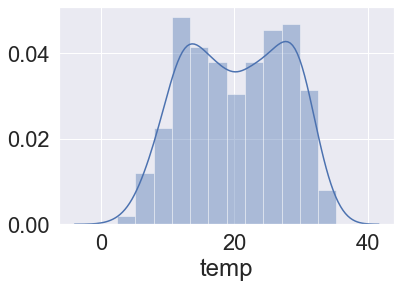

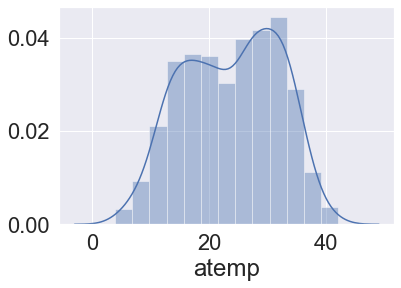

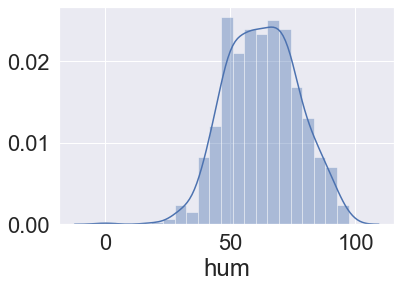

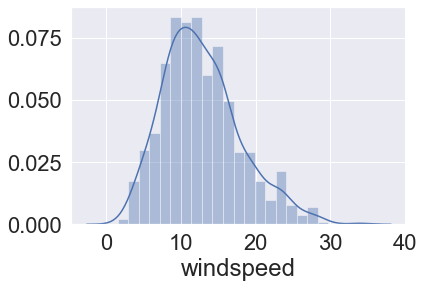

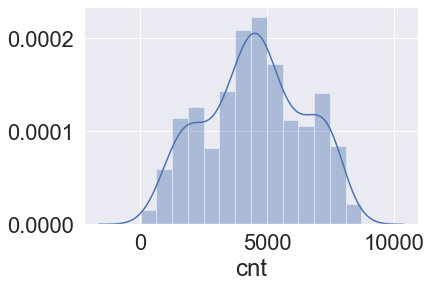

In [55]:
numerical_Cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for i in numerical_Cols:
    sns.distplot(bikes[i])
    plt.show()

In [56]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  day         730 non-null    int32  
dtypes: float64(4), int32(1), int64(6), object(4)
memory usage: 82.8+ KB


In [57]:
bikes[["yr","holiday","workingday"]]=bikes[["yr","holiday","workingday"]].astype('object')

In [58]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  day         730 non-null    int32  
dtypes: float64(4), int32(1), int64(3), object(7)
memory usage: 82.8+ KB


In [59]:
bikes_categorical = bikes.select_dtypes(exclude=["int64","int32","float64"])

In [60]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

In [61]:
bikes_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [62]:
len(bikes_categorical.columns)

7

0


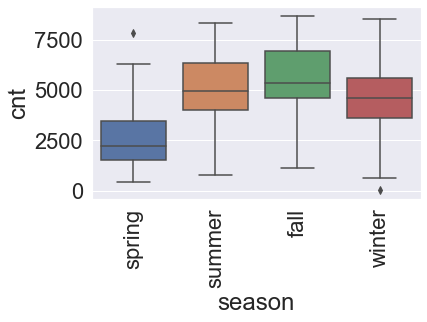

1


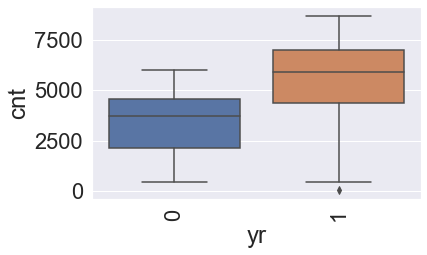

2


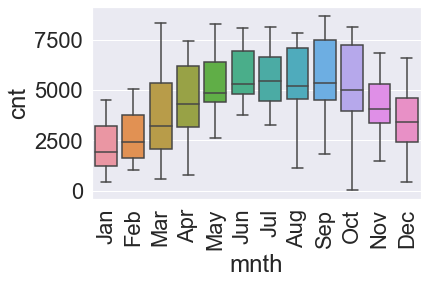

3


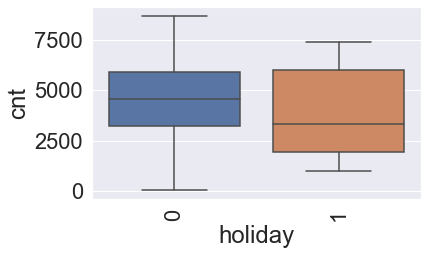

4


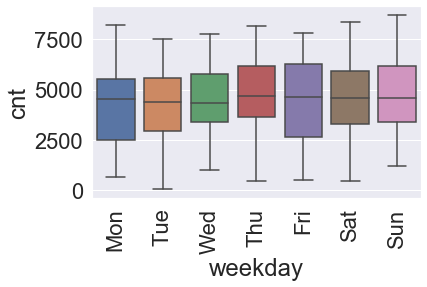

5


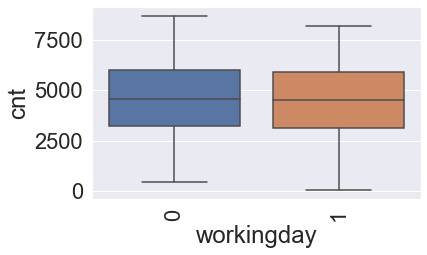

6


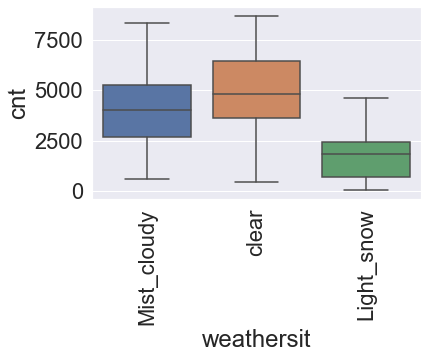

In [63]:
#for j in range(len(bikes_categorical.columns)):

A= list(bikes_categorical.columns)

#Index = A.index("yr")
#print(index)
for i in A :
    Index = A.index(i)
    print(Index)
    plt.figure(figsize=(20, 12))
    plt.subplot(3,3,Index+1)
    plot = sns.boxplot(x = i, y = 'cnt', data = bikes,)
    plt.setp(plot.get_xticklabels(),rotation = 90)
    plt.show()




###### 1. `Fall` season has the highest number 

###### 2. `From May till October` there is a hike in median values which means that the number of bookings are more during these seasons

###### 3. Median for weekdays and weekends are same therefore it can be concluded that the number of booking is same all the days of a week.

###### 4. From weathersit boxplot it can be referred that the people mostly preferred the bikes during `1. Clear, Few clouds, Partly cloudy, Partly cloudy` and  also they completely avoided  the bikes during 3. `Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog`

In [64]:
bikes[["cnt"]]=bikes[["cnt"]].astype('float')

In [65]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    float64
 14  day         730 non-null    int32  
dtypes: float64(5), int32(1), int64(2), object(7)
memory usage: 82.8+ KB


In [66]:
#Converting Numeric Cols into float:
float_Var_list = ["temp","atemp","hum","windspeed","cnt","casual","registered"]
for var in float_Var_list:
    bikes[var]=bikes[var].astype("float")
    

In [67]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    float64
 12  registered  730 non-null    float64
 13  cnt         730 non-null    float64
 14  day         730 non-null    int32  
dtypes: float64(7), int32(1), object(7)
memory usage: 82.8+ KB


In [68]:
bikes =bikes.drop("day", axis=1)

In [69]:
bikes_numeric = bikes.select_dtypes(include=("float"))

In [70]:
bikes_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    float64
 5   registered  730 non-null    float64
 6   cnt         730 non-null    float64
dtypes: float64(7)
memory usage: 40.0 KB


In [71]:
bikes_numeric.shape

(730, 7)

<Figure size 1440x360 with 0 Axes>

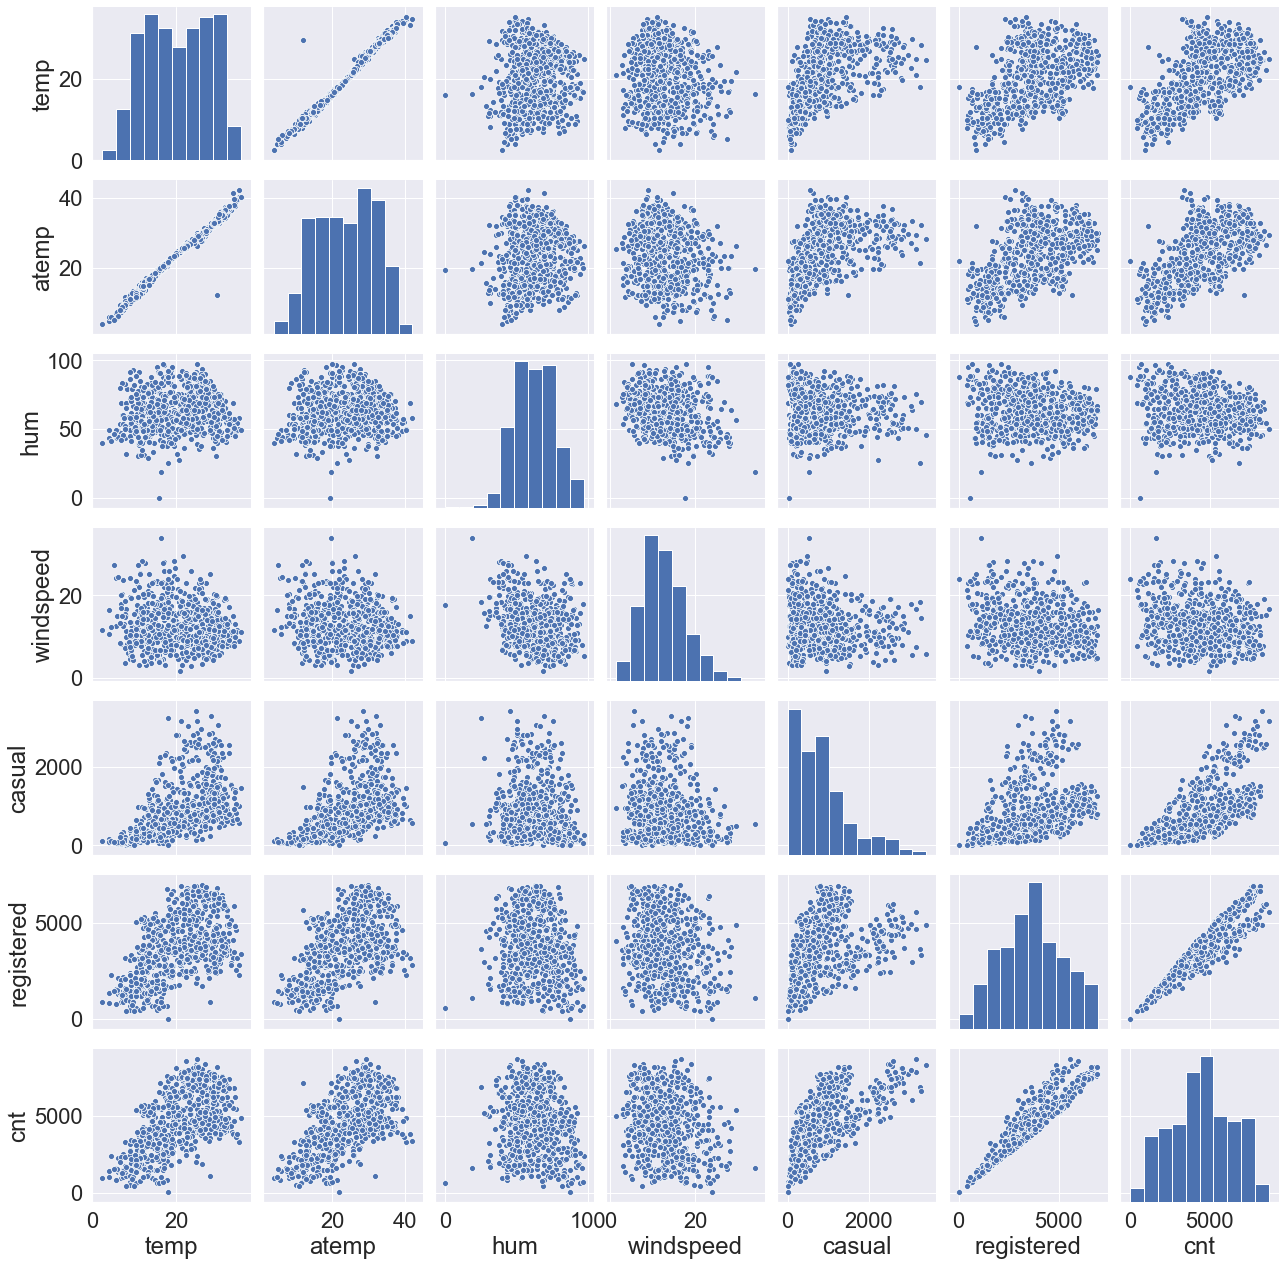

In [72]:
plt.figure(figsize = (20,5))
sns.pairplot(bikes_numeric)
plt.show()

In [73]:
cor = bikes_numeric.corr()
print(cor)

                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
hum         0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
cnt         0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

                 cnt  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000  


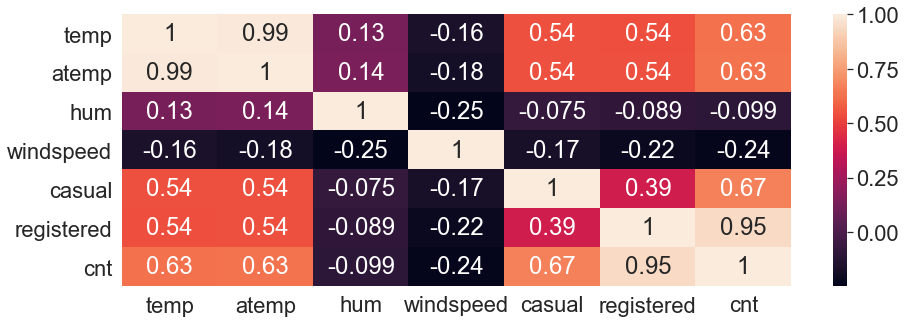

In [74]:
plt.figure(figsize = (15,5))
sns.heatmap(cor,annot=True)
plt.show()

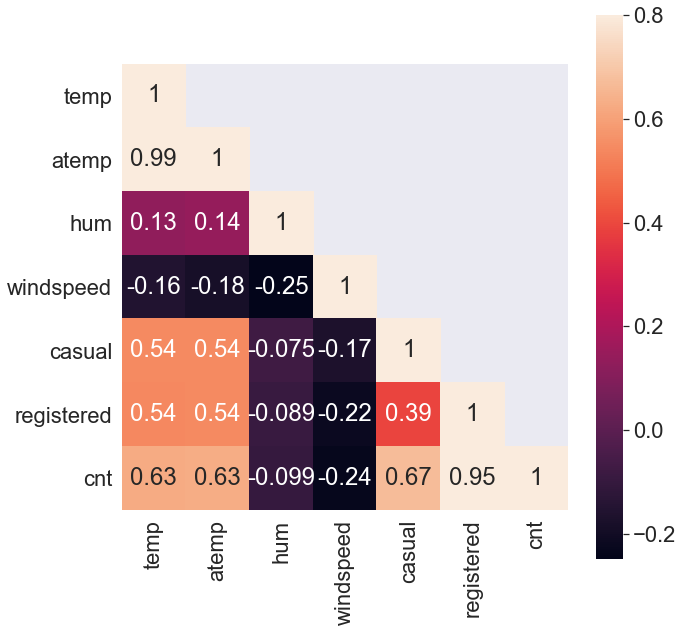

In [75]:
#Masking upper half of the map:
mask = np.array(cor)
mask[np.tril_indices_from(mask)]= False
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax= 0.8,square=True,annot=True);

Inference - 
In the order of Correlation values 
1. Registered - Highly positive 
2. Casual - Highly Positive 
3. temp and atemp (highly correlated with cnt and correlated to eachother)
4. hum  ( negatively but lowly correlated)
5. windspeed( significantly negatively correlated with cnt)

In [76]:
bikes.drop(["casual","registered"],axis=1,inplace =True)

In [77]:
bikes_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   yr          730 non-null    object
 2   mnth        730 non-null    object
 3   holiday     730 non-null    object
 4   weekday     730 non-null    object
 5   workingday  730 non-null    object
 6   weathersit  730 non-null    object
dtypes: object(7)
memory usage: 40.0+ KB


# 3. Data preparation

### Creating Dummy Variables

In [78]:
#ONE HOT ENCODING:
bikes_dummies=pd.get_dummies(bikes_categorical,drop_first=True)
bikes_dummies.head()


season_spring  season_summer  season_winter  yr_1  mnth_Aug  mnth_Dec  \
0              1              0              0     0         0         0   
1              1              0              0     0         0         0   
2              1              0              0     0         0         0   
3              1              0              0     0         0         0   
4              1              0              0     0         0         0   

   mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  ...  holiday_1  weekday_Mon  \
0         0         1         0         0  ...          0            1   
1         0         1         0         0  ...          0            0   
2         0         1         0         0  ...          0            0   
3         0         1         0         0  ...          0            0   
4         0         1         0         0  ...          0            0   

   weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   workingday_1  weathersit_Mist_cloudy  weathersit_clear  
0             1                       1                 0  
1             1                       1                 0  
2             1                       0                 1  
3             1                       0                 1  
4             1                       0                 1  

[5 rows x 25 columns]

In [79]:
bikes_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   season_spring           730 non-null    uint8
 1   season_summer           730 non-null    uint8
 2   season_winter           730 non-null    uint8
 3   yr_1                    730 non-null    uint8
 4   mnth_Aug                730 non-null    uint8
 5   mnth_Dec                730 non-null    uint8
 6   mnth_Feb                730 non-null    uint8
 7   mnth_Jan                730 non-null    uint8
 8   mnth_Jul                730 non-null    uint8
 9   mnth_Jun                730 non-null    uint8
 10  mnth_Mar                730 non-null    uint8
 11  mnth_May                730 non-null    uint8
 12  mnth_Nov                730 non-null    uint8
 13  mnth_Oct                730 non-null    uint8
 14  mnth_Sep                730 non-null    uint8
 15  holiday_1              

In [80]:
bikes = bikes.drop(bikes_categorical.columns,axis=1)

In [81]:
bikes.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [82]:
bikes = pd.concat([bikes,bikes_dummies],axis=1)

In [83]:
bikes.head()

temp     atemp      hum  windspeed     cnt  season_spring  \
0  14.110847  18.18125  80.5833  10.749882   985.0              1   
1  14.902598  17.68695  69.6087  16.652113   801.0              1   
2   8.050924   9.47025  43.7273  16.636703  1349.0              1   
3   8.200000  10.60610  59.0435  10.739832  1562.0              1   
4   9.305237  11.46350  43.6957  12.522300  1600.0              1   

   season_summer  season_winter  yr_1  mnth_Aug  ...  holiday_1  weekday_Mon  \
0              0              0     0         0  ...          0            1   
1              0              0     0         0  ...          0            0   
2              0              0     0         0  ...          0            0   
3              0              0     0         0  ...          0            0   
4              0              0     0         0  ...          0            0   

   weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   workingday_1  weathersit_Mist_cloudy  weathersit_clear  
0             1                       1                 0  
1             1                       1                 0  
2             1                       0                 1  
3             1                       0                 1  
4             1                       0                 1  

[5 rows x 30 columns]

In [84]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   hum                     730 non-null    float64
 3   windspeed               730 non-null    float64
 4   cnt                     730 non-null    float64
 5   season_spring           730 non-null    uint8  
 6   season_summer           730 non-null    uint8  
 7   season_winter           730 non-null    uint8  
 8   yr_1                    730 non-null    uint8  
 9   mnth_Aug                730 non-null    uint8  
 10  mnth_Dec                730 non-null    uint8  
 11  mnth_Feb                730 non-null    uint8  
 12  mnth_Jan                730 non-null    uint8  
 13  mnth_Jul                730 non-null    uint8  
 14  mnth_Jun                730 non-null    ui


# 4. Splitting the data into train-test set

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    510 non-null    float64
 1   atemp                   510 non-null    float64
 2   hum                     510 non-null    float64
 3   windspeed               510 non-null    float64
 4   cnt                     510 non-null    float64
 5   season_spring           510 non-null    uint8  
 6   season_summer           510 non-null    uint8  
 7   season_winter           510 non-null    uint8  
 8   yr_1                    510 non-null    uint8  
 9   mnth_Aug                510 non-null    uint8  
 10  mnth_Dec                510 non-null    uint8  
 11  mnth_Feb                510 non-null    uint8  
 12  mnth_Jan                510 non-null    uint8  
 13  mnth_Jul                510 non-null    uint8  
 14  mnth_Jun                510 non-null    u

In [88]:
print(df_train.describe(include="all"))

             temp       atemp         hum   windspeed          cnt  \
count  510.000000  510.000000  510.000000  510.000000   510.000000   
mean    20.102429   23.493909   63.112926   12.831318  4486.382353   
std      7.431169    8.090038   14.156632    5.291832  1952.158739   
min      2.424346    3.953480    0.000000    2.834381    22.000000   
25%     13.606865   16.603063   52.270825    9.041918  3120.000000   
50%     20.209597   24.020400   63.437500   12.083182  4530.000000   
75%     26.615847   30.177700   73.250025   15.750879  5973.500000   
max     35.328347   42.044800   97.041700   34.000021  8714.000000   

       season_spring  season_summer  season_winter        yr_1    mnth_Aug  \
count     510.000000     510.000000      510.00000  510.000000  510.000000   
mean        0.243137       0.245098        0.24902    0.507843    0.096078   
std         0.429398       0.430568        0.43287    0.500429    0.294988   
min         0.000000       0.000000        0.00000    0.0

# Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
bikes.head()

temp     atemp      hum  windspeed     cnt  season_spring  \
0  14.110847  18.18125  80.5833  10.749882   985.0              1   
1  14.902598  17.68695  69.6087  16.652113   801.0              1   
2   8.050924   9.47025  43.7273  16.636703  1349.0              1   
3   8.200000  10.60610  59.0435  10.739832  1562.0              1   
4   9.305237  11.46350  43.6957  12.522300  1600.0              1   

   season_summer  season_winter  yr_1  mnth_Aug  ...  holiday_1  weekday_Mon  \
0              0              0     0         0  ...          0            1   
1              0              0     0         0  ...          0            0   
2              0              0     0         0  ...          0            0   
3              0              0     0         0  ...          0            0   
4              0              0     0         0  ...          0            0   

   weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   workingday_1  weathersit_Mist_cloudy  weathersit_clear  
0             1                       1                 0  
1             1                       1                 0  
2             1                       0                 1  
3             1                       0                 1  
4             1                       0                 1  

[5 rows x 30 columns]

In [92]:
bikes.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_1', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_1', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'workingday_1', 'weathersit_Mist_cloudy',
       'weathersit_clear'],
      dtype='object')

In [93]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   hum                     730 non-null    float64
 3   windspeed               730 non-null    float64
 4   cnt                     730 non-null    float64
 5   season_spring           730 non-null    uint8  
 6   season_summer           730 non-null    uint8  
 7   season_winter           730 non-null    uint8  
 8   yr_1                    730 non-null    uint8  
 9   mnth_Aug                730 non-null    uint8  
 10  mnth_Dec                730 non-null    uint8  
 11  mnth_Feb                730 non-null    uint8  
 12  mnth_Jan                730 non-null    uint8  
 13  mnth_Jul                730 non-null    uint8  
 14  mnth_Jun                730 non-null    ui

# X- Features Data set and Y - The Target Variable Dataset

In [94]:
# Putting feature variable to X
X = bikes[['temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'yr_1', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_1', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'workingday_1', 'weathersit_Mist_cloudy',
       'weathersit_clear']]

# Putting response variable to y
y = bikes['cnt']

In [95]:
from sklearn.model_selection import train_test_split 

In [96]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
bikes.head()

temp     atemp      hum  windspeed     cnt  season_spring  \
0  14.110847  18.18125  80.5833  10.749882   985.0              1   
1  14.902598  17.68695  69.6087  16.652113   801.0              1   
2   8.050924   9.47025  43.7273  16.636703  1349.0              1   
3   8.200000  10.60610  59.0435  10.739832  1562.0              1   
4   9.305237  11.46350  43.6957  12.522300  1600.0              1   

   season_summer  season_winter  yr_1  mnth_Aug  ...  holiday_1  weekday_Mon  \
0              0              0     0         0  ...          0            1   
1              0              0     0         0  ...          0            0   
2              0              0     0         0  ...          0            0   
3              0              0     0         0  ...          0            0   
4              0              0     0         0  ...          0            0   

   weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   workingday_1  weathersit_Mist_cloudy  weathersit_clear  
0             1                       1                 0  
1             1                       1                 0  
2             1                       0                 1  
3             1                       0                 1  
4             1                       0                 1  

[5 rows x 30 columns]

In [100]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [101]:
df_train.head()

temp     atemp       hum  windspeed       cnt  season_spring  \
653  0.509887  0.501133  0.575354   0.300794  0.864243              0   
576  0.815169  0.766351  0.725633   0.264686  0.827658              0   
426  0.442393  0.438975  0.640189   0.255342  0.465255              1   
728  0.245101  0.200348  0.498067   0.663106  0.204096              1   
482  0.395666  0.391735  0.504508   0.188475  0.482973              0   

     season_summer  season_winter  yr_1  mnth_Aug  ...  holiday_1  \
653              0              1     1         0  ...          0   
576              0              0     1         0  ...          0   
426              0              0     1         0  ...          0   
728              0              0     1         0  ...          0   
482              1              0     1         0  ...          0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
653            0            0            0            0            0   
576            0            0            0            0            0   
426            0            0            1            0            0   
728            1            0            0            0            0   
482            0            0            1            0            0   

     weekday_Wed  workingday_1  weathersit_Mist_cloudy  weathersit_clear  
653            1             1                       0                 1  
576            1             1                       0                 1  
426            0             0                       1                 0  
728            0             1                       0                 1  
482            0             0                       1                 0  

[5 rows x 30 columns]

In [102]:
print(df_train.describe(include="all"))

             temp       atemp         hum   windspeed         cnt  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.537262    0.512989    0.650369    0.320768    0.513620   
std      0.225844    0.212385    0.145882    0.169797    0.224593   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.339853    0.332086    0.538643    0.199179    0.356420   
50%      0.540519    0.526811    0.653714    0.296763    0.518638   
75%      0.735215    0.688457    0.754830    0.414447    0.684710   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       season_spring  season_summer  season_winter        yr_1    mnth_Aug  \
count     510.000000     510.000000      510.00000  510.000000  510.000000   
mean        0.243137       0.245098        0.24902    0.507843    0.096078   
std         0.429398       0.430568        0.43287    0.500429    0.294988   
min         0.000000       0.000000        0.00000    0.000000    

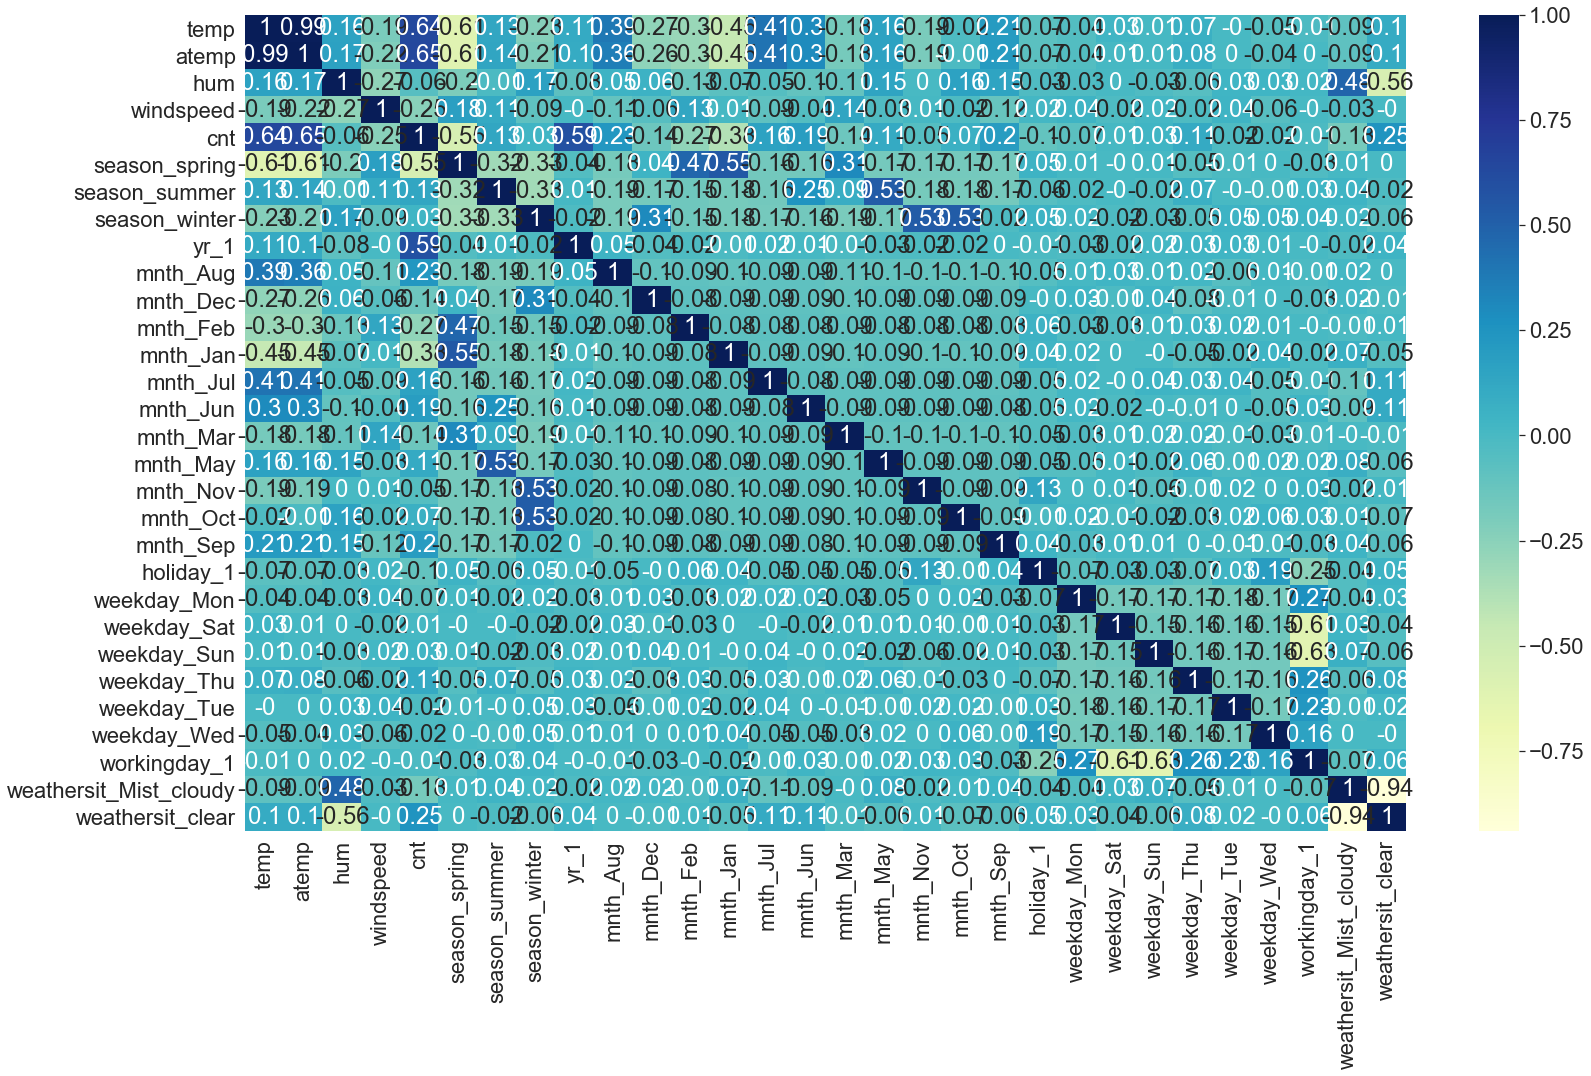

In [103]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 15))
sns.heatmap(df_train.corr().round(2), annot = True, cmap="YlGnBu")
plt.show()

In [104]:
y_train = df_train.pop('cnt')
X_train = df_train

# 5.Building the model using RFE (Recursive Feature Elimination)

In [105]:
#importing RFE and Linear Regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [106]:
df_train.head()

temp     atemp       hum  windspeed  season_spring  season_summer  \
653  0.509887  0.501133  0.575354   0.300794              0              0   
576  0.815169  0.766351  0.725633   0.264686              0              0   
426  0.442393  0.438975  0.640189   0.255342              1              0   
728  0.245101  0.200348  0.498067   0.663106              1              0   
482  0.395666  0.391735  0.504508   0.188475              0              1   

     season_winter  yr_1  mnth_Aug  mnth_Dec  ...  holiday_1  weekday_Mon  \
653              1     1         0         0  ...          0            0   
576              0     1         0         0  ...          0            0   
426              0     1         0         0  ...          0            0   
728              0     1         0         1  ...          0            1   
482              0     1         0         0  ...          0            0   

     weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
653            0            0            0            0            1   
576            0            0            0            0            1   
426            0            1            0            0            0   
728            0            0            0            0            0   
482            0            1            0            0            0   

     workingday_1  weathersit_Mist_cloudy  weathersit_clear  
653             1                       0                 1  
576             1                       0                 1  
426             0                       1                 0  
728             1                       0                 1  
482             0                       1                 0  

[5 rows x 29 columns]

In [107]:
#Running RFE  with the output number of the variable equal to 10 
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=25)

rfe = rfe.fit(X_train,y_train)

In [108]:
df_train.head()

temp     atemp       hum  windspeed  season_spring  season_summer  \
653  0.509887  0.501133  0.575354   0.300794              0              0   
576  0.815169  0.766351  0.725633   0.264686              0              0   
426  0.442393  0.438975  0.640189   0.255342              1              0   
728  0.245101  0.200348  0.498067   0.663106              1              0   
482  0.395666  0.391735  0.504508   0.188475              0              1   

     season_winter  yr_1  mnth_Aug  mnth_Dec  ...  holiday_1  weekday_Mon  \
653              1     1         0         0  ...          0            0   
576              0     1         0         0  ...          0            0   
426              0     1         0         0  ...          0            0   
728              0     1         0         1  ...          0            1   
482              0     1         0         0  ...          0            0   

     weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
653            0            0            0            0            1   
576            0            0            0            0            1   
426            0            1            0            0            0   
728            0            0            0            0            0   
482            0            1            0            0            0   

     workingday_1  weathersit_Mist_cloudy  weathersit_clear  
653             1                       0                 1  
576             1                       0                 1  
426             0                       1                 0  
728             1                       0                 1  
482             0                       1                 0  

[5 rows x 29 columns]

In [109]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 4),
 ('mnth_Mar', False, 5),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 3),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('workingday_1', True, 1),
 ('weathersit_Mist_cloudy', True, 1),
 ('weathersit_clear', True, 1)]

In [110]:
col= X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'holiday_1',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Tue',
       'weekday_Wed', 'workingday_1', 'weathersit_Mist_cloudy',
       'weathersit_clear'],
      dtype='object')

In [111]:
X_train.columns[~rfe.support_]

Index(['mnth_Jun', 'mnth_Mar', 'mnth_Oct', 'weekday_Thu'], dtype='object')

In [112]:
# CREATING X test dataset with rfe selected variables 
X_train_rfe=X_train[col]

In [113]:
#Adding a constant Variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [114]:
# Running the Linear Model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [115]:
# Lets see the summary of Linear Model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.81e-182
Time:                        22:35:35   Log-Likelihood:                 523.82
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [116]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [117]:
# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                     temp  400.93
1                    atemp  374.25
22            workingday_1   75.95
2                      hum   36.59
24        weathersit_clear   24.92
19             weekday_Sun   14.97
18             weekday_Sat   14.17
23  weathersit_Mist_cloudy   12.63
4            season_spring   10.56
5            season_summer    8.23
6            season_winter    8.04
3                windspeed    5.65
8                 mnth_Aug    3.48
16               holiday_1    3.16
12                mnth_Jul    3.00
11                mnth_Jan    2.58
15                mnth_Sep    2.36
7                     yr_1    2.12
14                mnth_Nov    2.03
10                mnth_Feb    1.99
9                 mnth_Dec    1.80
13                mnth_May    1.64
20             weekday_Tue    1.56
17             weekday_Mon    1.55
21             weekday_Wed    1.53

Elimination of Columns is applied in the following manner : 
    1. HIGH VIF AND HIGH P-VALUE 
    2. HIGH P-VALUE AND LOW VIF
    3. HIGH VIF AND LOW P-VALUE
    4. LOW VIF AND LOW P-VALUE
    

# Running 2nd model (lm_model2)

In [118]:
#1. Removing atemp--- high P Value and high VIF value

print(len(X_train_rfe.columns))
X2 = X_train_rfe.drop(['atemp'], axis=1)

import statsmodels.api as sm
X_train_lm_2 = sm.add_constant(X2)

lm_model2= sm.OLS(y_train,X_train_lm_2).fit()

# Print Summary 
print(lm_model2.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X2
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

25
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.71e-183
Time:                        22:35:36   Log-Likelihood:                 523.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     485   BIC:                            -891.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [119]:
#2. Removing workingday_1--- high P Value and high VIF value

print(len(X2.columns))
X3 = X2.drop(['workingday_1'], axis=1)

import statsmodels.api as sm
X_train_lm_3 = sm.add_constant(X3)

lm_model3= sm.OLS(y_train,X_train_lm_3).fit()

# Print Summary 
print(lm_model3.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X3
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

24
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.82e-184
Time:                        22:35:36   Log-Likelihood:                 523.37
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     486   BIC:                            -897.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [120]:
#3. Removing weekday_Sat--- high P Value
print(len(X3.columns))
X4 = X3.drop(['weekday_Sat'], axis=1)

import statsmodels.api as sm
X_train_lm_4 = sm.add_constant(X4)

lm_model4= sm.OLS(y_train,X_train_lm_4).fit()

# Print Summary 
print(lm_model4.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X4
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

23
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.27e-185
Time:                        22:35:36   Log-Likelihood:                 523.36
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     487   BIC:                            -903.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [121]:
#4. Removing weekday_Sun--- high P Value
print(len(X4.columns))
X5 = X4.drop(['weekday_Sun'], axis=1)

import statsmodels.api as sm
X_train_lm_5 = sm.add_constant(X5)

lm_model5= sm.OLS(y_train,X_train_lm_5).fit()

# Print Summary 
print(lm_model5.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X5
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

22
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.36e-186
Time:                        22:35:36   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     488   BIC:                            -909.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [122]:
#4. Removing mnth_Aug--- high P Value
print(len(X5.columns))
X6 = X5.drop(['mnth_Aug'], axis=1)

import statsmodels.api as sm
X_train_lm_6 = sm.add_constant(X6)

lm_model6= sm.OLS(y_train,X_train_lm_6).fit()

# Print Summary 
print(lm_model6.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X6
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

21
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.05e-187
Time:                        22:35:36   Log-Likelihood:                 522.84
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     489   BIC:                            -914.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [123]:
#6. Removing weekday_Wed--- high P Value
print(len(X6.columns))
X7 = X6.drop(['weekday_Wed'], axis=1)

import statsmodels.api as sm
X_train_lm_7 = sm.add_constant(X7)

lm_model7= sm.OLS(y_train,X_train_lm_7).fit()

# Print Summary 
print(lm_model7.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X7
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

20
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.12e-188
Time:                        22:35:36   Log-Likelihood:                 522.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -919.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [124]:
#7. Removing mnth_May--- high P Value
print(len(X6.columns))
X8 = X7.drop(['mnth_May'], axis=1)

import statsmodels.api as sm
X_train_lm_8 = sm.add_constant(X8)

lm_model8= sm.OLS(y_train,X_train_lm_8).fit()

# Print Summary 
print(lm_model8.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X8
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

20
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.44e-188
Time:                        22:35:36   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     491   BIC:                            -924.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [125]:
#8. Removing mnth_May--- high VIF Value
print(len(X8.columns))
X9 = X8.drop(['hum'], axis=1)

import statsmodels.api as sm
X_train_lm_9 = sm.add_constant(X9)

lm_model9= sm.OLS(y_train,X_train_lm_9).fit()

# Print Summary 
print(lm_model9.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X9
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

18
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.02e-186
Time:                        22:35:37   Log-Likelihood:                 513.04
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     492   BIC:                            -913.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [126]:
#10. Removing mnth_Feb--- high p Value
print(len(X9.columns))
X10 = X9.drop(['mnth_Feb'], axis=1)

import statsmodels.api as sm
X_train_lm_10 = sm.add_constant(X10)

lm_model10= sm.OLS(y_train,X_train_lm_10).fit()

# Print Summary 
print(lm_model10.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X10
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

17
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.20e-186
Time:                        22:35:37   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     493   BIC:                            -916.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [127]:
#10. Removing weathersit_clear--- high p Value
print(len(X10.columns))
X11 = X10.drop(['weathersit_clear'], axis=1)

import statsmodels.api as sm
X_train_lm_11 = sm.add_constant(X11)

lm_model11= sm.OLS(y_train,X_train_lm_11).fit()

# Print Summary 
print(lm_model11.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X11
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

16
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     129.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.56e-160
Time:                        22:35:37   Log-Likelihood:                 444.69
No. Observations:                 510   AIC:                            -857.4
Df Residuals:                     494   BIC:                            -789.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [128]:
#10. Removing mnth_Nov--- high p Value
print(len(X11.columns))
X12 = X11.drop(['mnth_Nov'], axis=1)

import statsmodels.api as sm
X_train_lm_12 = sm.add_constant(X12)

lm_model12= sm.OLS(y_train,X_train_lm_12).fit()

# Print Summary 
print(lm_model12.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X12
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

15
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.10e-160
Time:                        22:35:37   Log-Likelihood:                 443.96
No. Observations:                 510   AIC:                            -857.9
Df Residuals:                     495   BIC:                            -794.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [129]:
#12. Removing mnth_Dec--- high p Value
print(len(X12.columns))
X13 = X12.drop(['mnth_Dec'], axis=1)

import statsmodels.api as sm
X_train_lm_13 = sm.add_constant(X13)

lm_model13= sm.OLS(y_train,X_train_lm_13).fit()

# Print Summary 
print(lm_model13.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X13
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

14
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     148.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.50e-161
Time:                        22:35:37   Log-Likelihood:                 443.42
No. Observations:                 510   AIC:                            -858.8
Df Residuals:                     496   BIC:                            -799.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [130]:
#13. Removing mnth_Jan--- high p Value
print(len(X13.columns))
X14 = X13.drop(['mnth_Jan'], axis=1)

import statsmodels.api as sm
X_train_lm_14 = sm.add_constant(X14)

lm_model14= sm.OLS(y_train,X_train_lm_14).fit()

# Print Summary 
print(lm_model14.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X14
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

13
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     160.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.34e-162
Time:                        22:35:37   Log-Likelihood:                 442.05
No. Observations:                 510   AIC:                            -858.1
Df Residuals:                     497   BIC:                            -803.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [131]:
#14. Removing mnth_Jan--- high p Value
print(len(X14.columns))
X15 = X14.drop(['weekday_Tue'], axis=1)

import statsmodels.api as sm
X_train_lm_15 = sm.add_constant(X15)

lm_model15= sm.OLS(y_train,X_train_lm_15).fit()

# Print Summary 
print(lm_model15.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X15
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

12
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.79e-162
Time:                        22:35:37   Log-Likelihood:                 440.28
No. Observations:                 510   AIC:                            -856.6
Df Residuals:                     498   BIC:                            -805.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [132]:
#15. Removing mnth_Jan--- high p Value
print(len(X15.columns))
X16 = X15.drop(['weekday_Mon'], axis=1)

import statsmodels.api as sm
X_train_lm_16 = sm.add_constant(X16)

lm_model16= sm.OLS(y_train,X_train_lm_16).fit()

# Print Summary 
print(lm_model16.summary())

# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X16
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],0)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

11
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.44e-163
Time:                        22:35:38   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

In [133]:
y_train_cnt = lm_model16.predict(X_train_lm_16)

In [134]:
#importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Residual analysis of train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

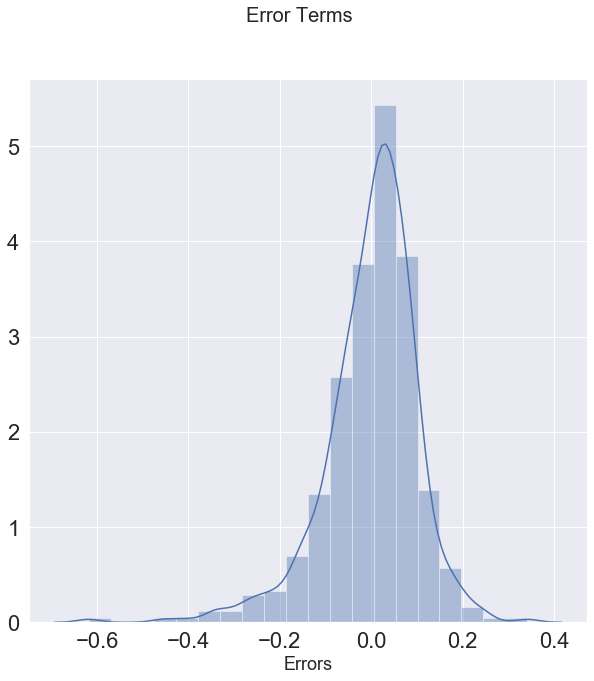

In [135]:
fig = plt.figure(figsize = (10,10))
sns.distplot((y_train-y_train_cnt),bins = 20)
fig.suptitle(('Error Terms'),fontsize = 20) # Plot Heading
plt.xlabel("Errors",fontsize = 18)# Labels
plt.show()

# 7. MAKING PREDICTIONS ON TEST SET

In [136]:
X_train_lm_16.columns

Index(['const', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_Jul', 'mnth_Sep', 'holiday_1',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [137]:
#Applying the scalling on the test sets 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [138]:
y_test = df_test.pop('cnt')

In [139]:
X_test = df_test

In [140]:
X_train_new = X16

In [141]:
X_train_new.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_1', 'mnth_Jul', 'mnth_Sep', 'holiday_1', 'weathersit_Mist_cloudy'],
      dtype='object')

In [142]:
# Now lets use our model to predict 

# Creating  X test new dataframe by dropping variables  from X_test 
X_test_new = X_test[X_train_new.columns]

# Adding a constant Variable 
X_test_new = sm.add_constant(X_test_new) 

In [143]:
# Making Predictions 
y_pred = lm_model16.predict(X_test_new)

# 8. MODEL EVALUATION

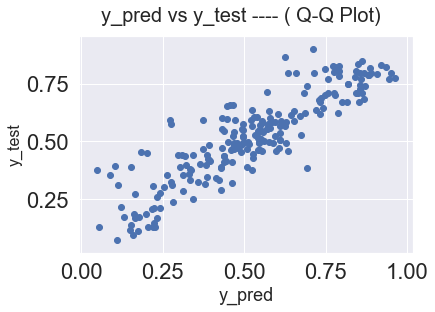

In [144]:
#Plotting y_test and y_pred to understand the spread.  
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_pred vs y_test ---- ( Q-Q Plot)", fontsize = 20)#Plot Heading
plt.xlabel('y_pred',fontsize=18)# plot X-label
plt.ylabel('y_test',fontsize=16)# plot Y-label
plt.show()

In [145]:
from sklearn.metrics import r2_score
print("r2_score of the model:",r2_score(y_test, y_pred).round(2))

r2_score of the model: 0.78


In [146]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [147]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.01054977770608403
r_square_value : 0.7778798147259004


Text(0, 0.5, 'cnt')

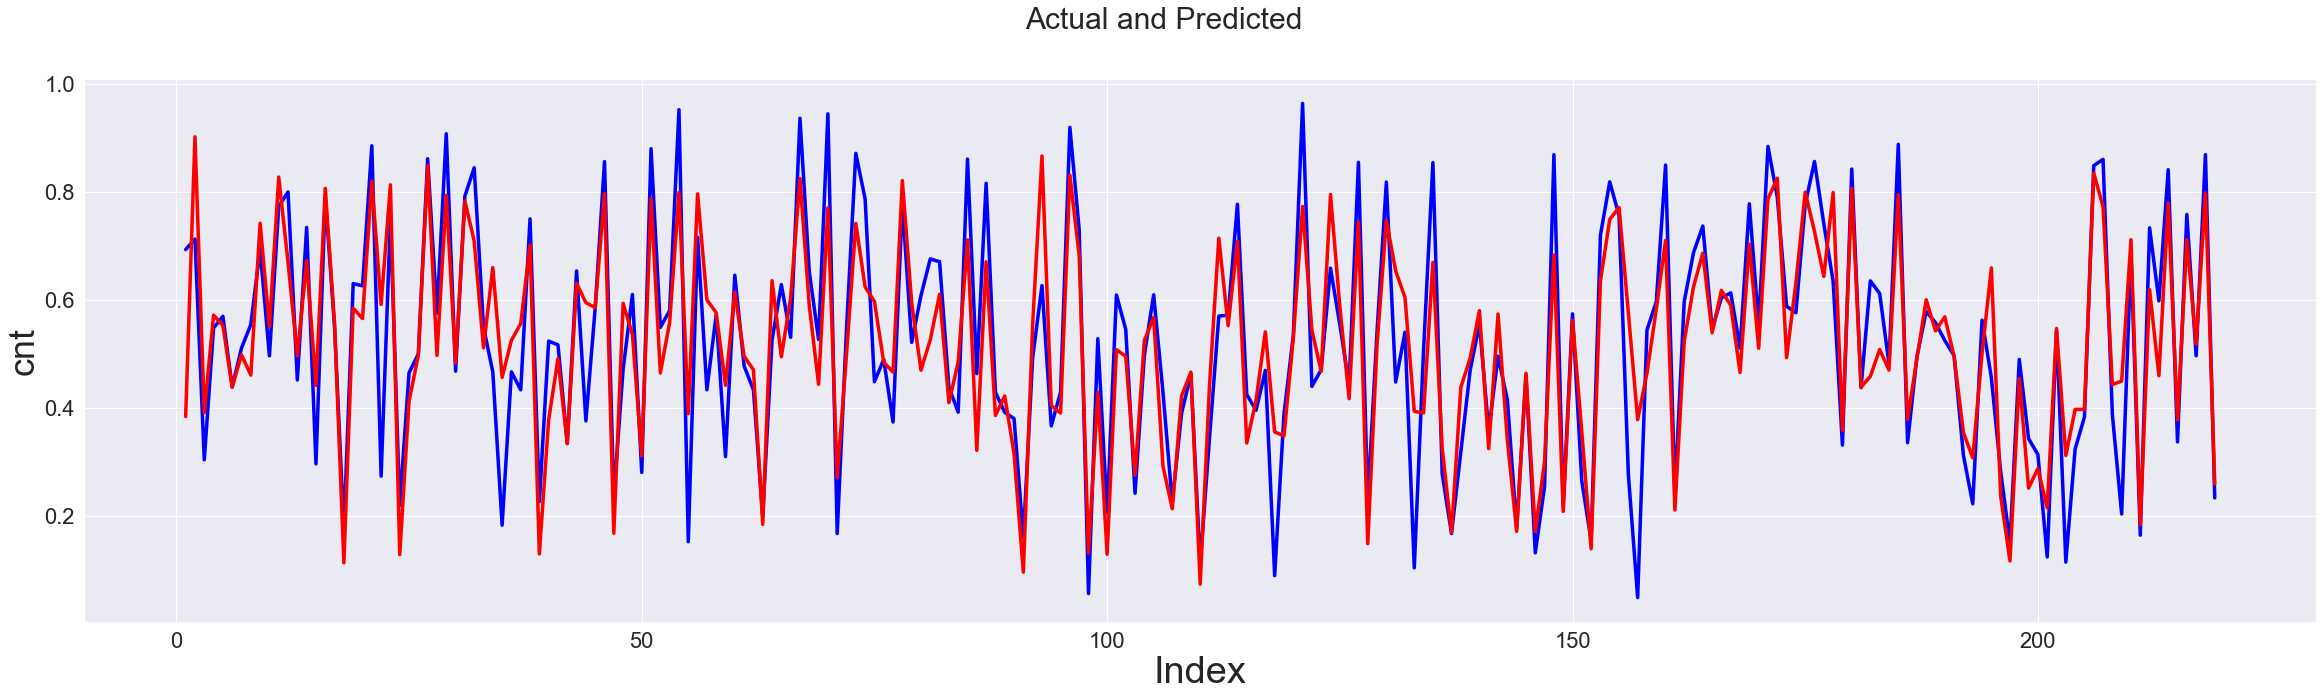

In [148]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(40,10))
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=30)              # Plot heading 
plt.xlabel('Index', fontsize=38)                               # X-label
plt.ylabel('cnt', fontsize=36)  

Text(0, 0.5, 'cnt')

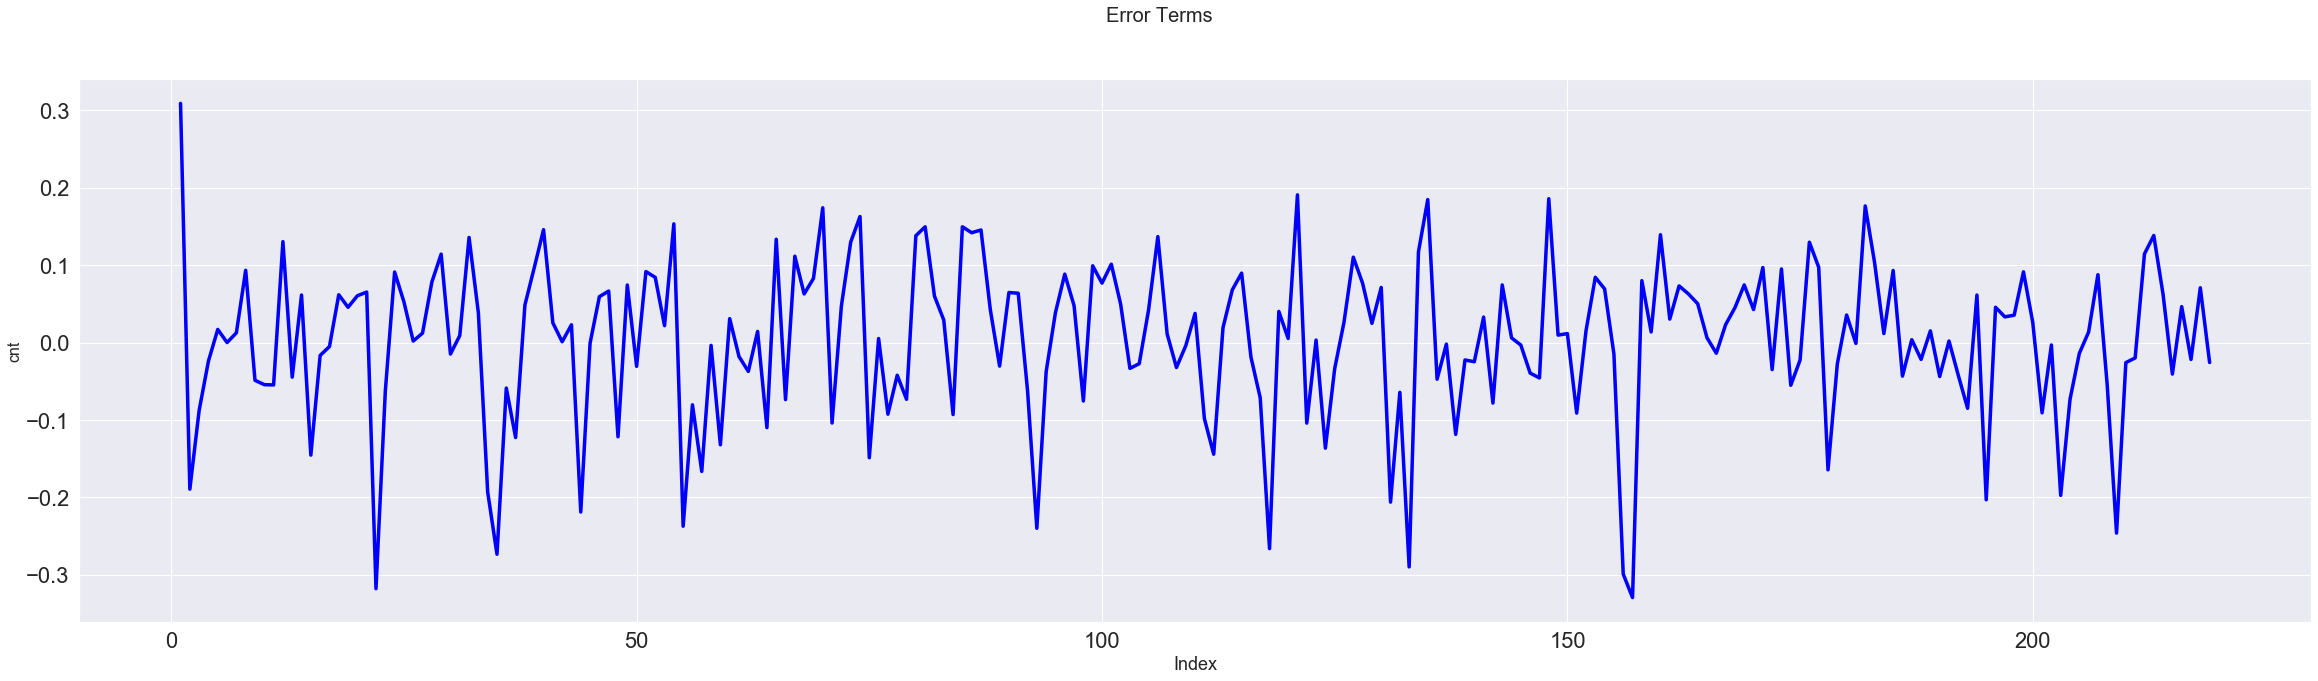

In [149]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize = (40,10))
plt.plot(c,y_test-y_pred, color="blue", linewidth=3.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('cnt', fontsize=16)                # Y-label

In [150]:
from sklearn.metrics import mean_squared_error, r2_score

In [151]:
mse

0.01054977770608403

In [152]:
import math as math
rmse = math.sqrt(mse)
print("Root Mean Square Error:",rmse)

Root Mean Square Error: 0.10271211080531852


In [153]:
y_pred

184    0.383559
535    0.901411
299    0.390974
221    0.571217
152    0.551983
         ...   
400    0.377140
702    0.710903
127    0.517736
640    0.797733
72     0.258524
Length: 219, dtype: float64

# Params of 16th Model model (lm_model16)

In [154]:
# Checking the parameters obtained

lm_model16.params

const                     0.187186
temp                      0.503879
windspeed                -0.177287
season_spring            -0.059663
season_summer             0.048280
season_winter             0.073304
yr_1                      0.239025
mnth_Jul                 -0.055039
mnth_Sep                  0.067113
holiday_1                -0.084542
weathersit_Mist_cloudy   -0.068234
dtype: float64